In [4]:
import matplotlib.pyplot as plt
import scipy as sc
import numpy as np

# Parte B (Bifurcación)

Considere el modelo poblacional reducido

$$\frac{dz}{dt} = \mu z - z^2$$

donde $\mu$ es un parámetro ambiental que mide la capacidad de crecimiento.

(Análisis Teorico del Modelo desde el punto de vista de una EDO) (Issue #B.1)

(Representar el problema como una EDO, identificar parámetros, condiciones iniciales y contexto físico/biológico)

### Preguntas clave:

1. Determine los puntos de equilibrio en función de $\mu$.

(Issue #B.1)

2. Clasifique su estabilidad mediante $z^′ = \mu − 2z$.

(Issue #B.1)

3. Construya el diagrama de bifurcación en el plano ($\mu, z$) e identifique el tipo de bifurcación. Interprete el resultado en el contexto de poblaciones limitadas y capacidad máxima.



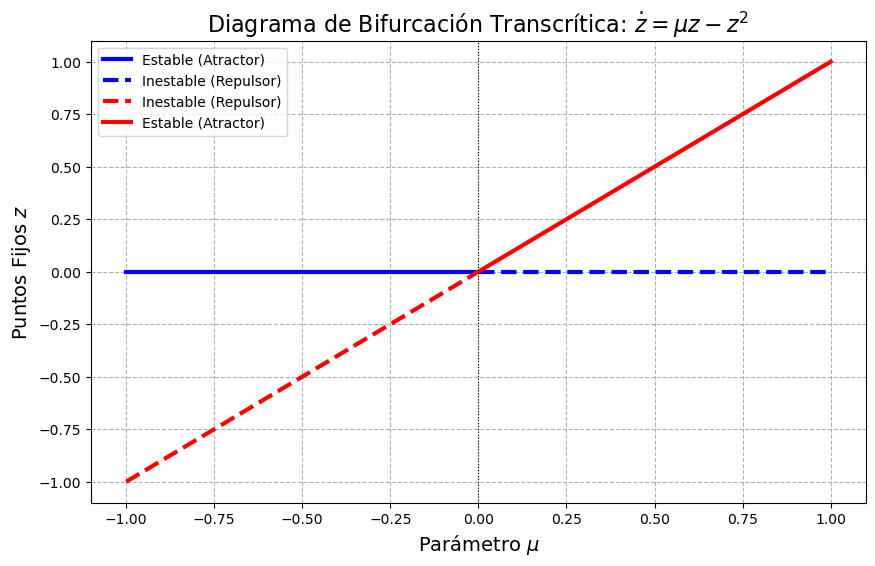

In [ ]:
# --- 1. Define the parameter (mu) range ---
mu_values = np.linspace(-1, 1, 500) 

# --- 2. Define the fixed points ---
z1 = np.zeros_like(mu_values)  # z = 0
z2 = mu_values                  # z = mu

plt.figure(figsize=(10, 6))

# --- 3. Plot stability for (z = 0) ---
# Stable for mu < 0
mu_neg = mu_values[mu_values < 0]
plt.plot(mu_neg, np.zeros_like(mu_neg), 'b-', linewidth=3, label='Estable (Atractor)')
# Unstable for mu > 0
mu_pos = mu_values[mu_values >= 0]
plt.plot(mu_pos, np.zeros_like(mu_pos), 'b--', linewidth=3, label='Inestable (Repulsor)')


# --- 4. Plot stability for (z = mu) ---
# Stable for mu > 0
plt.plot(mu_pos, mu_pos, 'r-', linewidth=3, label='Estable (Atractor)')
# Unstable for mu < 0
plt.plot(mu_neg, mu_neg, 'r--', linewidth=3, label='Inestable (Repulsor)')  



# --- 5. Graph formatting ---
plt.axvline(0, color='k', linestyle=':', linewidth=0.8) # Bifurcation point
plt.xlabel(r'Parámetro $\mu$', fontsize=14)
plt.ylabel(r'Puntos Fijos $z$', fontsize=14)
plt.title(r'Diagrama de Bifurcación Transcrítica: $\dot{z} = \mu z - z^2$', fontsize=16)

# Ensure the legend is clear and non-duplicated
plt.legend( loc='upper left') 
plt.grid(True, linestyle='--')
plt.show()

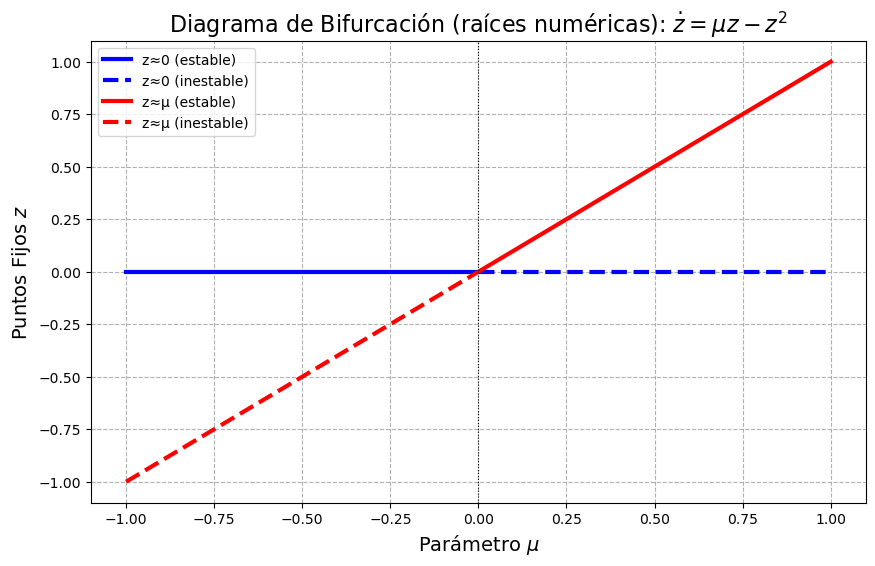

Error máximo rama z≈0: 0.000e+00, rama z≈μ: 0.000e+00


In [ ]:
# --- Numerical computation of zeros and bifurcation diagram construction ---

# Parameter grid for mu
mu_values = np.linspace(-1, 1, 500)
n = mu_values.size

# Prepare arrays to store the two roots and stability flags
root_a = np.empty(n)
root_b = np.empty(n)
stable_a = np.empty(n, dtype=bool)
stable_b = np.empty(n, dtype=bool)

# For each mu compute polynomial roots of f(z)=mu*z - z**2 -> -z^2 + mu*z + 0
for i, mu in enumerate(mu_values):
    coeffs = [-1.0, mu, 0.0]  # -z^2 + mu*z + 0
    r = np.roots(coeffs)

    r_real = np.array([np.real(r[0]), np.real(r[1])])
    if abs(r_real[0]) <= abs(r_real[1]):
        z0, z1 = r_real[0], r_real[1]
    else:
        z0, z1 = r_real[1], r_real[0]
    root_a[i] = z0
    root_b[i] = z1
    stable_a[i] = (mu - 2.0*z0) < 0
    stable_b[i] = (mu - 2.0*z1) < 0

# Plot the computed branches, separating stable/unstable segments
plt.figure(figsize=(10, 6))

# Branch A (root near zero): plot stable segments solid, unstable dashed
mask = stable_a
if np.any(mask):
    plt.plot(mu_values[mask], root_a[mask], 'b-', linewidth=3, label='z≈0 (estable)')
if np.any(~mask):
    plt.plot(mu_values[~mask], root_a[~mask], 'b--', linewidth=3, label='z≈0 (inestable)')

# Branch B (other root): similarly
mask_b = stable_b
if np.any(mask_b):
    plt.plot(mu_values[mask_b], root_b[mask_b], 'r-', linewidth=3, label='z≈μ (estable)')
if np.any(~mask_b):
    plt.plot(mu_values[~mask_b], root_b[~mask_b], 'r--', linewidth=3, label='z≈μ (inestable)')

# Mark bifurcation point and labels (keep Spanish labels)
plt.axvline(0, color='k', linestyle=':', linewidth=0.8)
plt.xlabel(r'Parámetro $\mu$', fontsize=14)
plt.ylabel(r'Puntos Fijos $z$', fontsize=14)
plt.title(r'Diagrama de Bifurcación (raíces numéricas): $\dot{z} = \mu z - z^2$', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--')
plt.show()

analytical_a = np.zeros_like(mu_values)
analytical_b = mu_values
err_a = np.max(np.abs(root_a - analytical_a))
err_b = np.max(np.abs(root_b - analytical_b))
print(f'Error máximo rama z≈0: {err_a:.3e}, rama z≈μ: {err_b:.3e}')

La ecuación diferencial $ \frac{dz}{dt}=\mu z-z^2$ presenta un Diagrama de Bifurcación Transcrítica. Este no es más que la representación gráfica de un sistema dinámico donde dos puntos fijos (estados de equilibrio) existen para todos los valores del parámetro, pero al cruzarse en el punto de bifurcación, intercambia su estabilidad.
- **Puntos fijos:** Existen dos puntos fijos para todo  $\mu$:$x_1=0$ y $x_2=\mu$.
- **Estructura gráfica:** El diagrama consiste en dos líneas rectas que se cruzan en el punto de bifurcación $(\mu , x)=(0,0)$
---
En el contexto de las de poblaciones limitadas y capacidad máxima la Bifurcación Trancrítica que ocurre en $\mu _c=0$ representa el **umbral de supervivencia** del sistema biológico. Es el punto donde el ambiente pasa de ser fatal a ser sostenible.
1. **Región crítica: $\mu <0$ (ambiente no sostenible):**
- **Punto $z_1=0$ (Estable):** La extinción es el único estado sostenible en el tiempo.
- **Punto $z_2=\mu$ (Inestable):** No es relevante biológicamente ya que la capacidad de carga no puede ser negativa.

**Resultado:** La tasa de mortalidad neta es mayor que la tasa de natalidad. No importa cuán grande se la población inicial (excepto si $z=0$), la tendencia siempre es hacia la extinción.ç

2. Región Positiva: $\mu > 0$ (Ambiente Sostenible)
- **Punto $z_1 = 0$ (Inestable):** La extinción ya no es estable. Si hay una pequeña población inicial, esta crecerá (es repelida de $z=0$).
-**Punto $z_2 = \mu$ (Estable):** Esta rama, $z_2$, se convierte en la nueva Capacidad de Carga ($K$).

**Resultado:** La tasa de natalidad neta es mayor. El sistema empuja a la población lejos de la extinción hacia un nuevo equilibrio estable determinado por el parámetro. Si los recursos limitados permiten una tasa de crecimiento $\mu$, la población tenderá a asentarse en ese valor $z=\mu$, que ahora es la capacidad máxima.


### Planteamiento del Problema:

Para garantizar que nuestro problema está bien planteado es necesario y suficiente garantizar las siguientes propiedades:
1. Existencia de la solución.
2. Unicidad de la solución.
3. Dependencia continua de los datos.

Tomemos $$f(z,t)=\mu z-z^2$$
Luego 

$$\frac{dz}{dt} = f(z,t)$$

Como $f(z,t)$ es un polinomio es continua $\forall z \in \mathbb{R}$.  

Luego analicemos la continuidad de $f'(z)$:  

$$f'(z)=\mu -2z$$
Como $f'(z)$ es un polinomio es continua.

Tenemos que nuestra función y su primera derivada son continuas, luego por la demostración realizada en la parte A podemos asegurar que nuestro problema de bifurcación transcrítica está **bien planteado** matemáticamente.

